In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_image='D:/Documents/Capstone/Project -2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)

In [4]:
training_set=train_datagen.flow_from_directory(train_image,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=512)

Found 47454 images belonging to 35 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=test_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=512)

Found 14321 images belonging to 35 classes.


In [6]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
 
base_model.trainable=False
 
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(35, activation='softmax')
    ])

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 5, 5, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [9]:
early = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [10]:
batch_size=512
STEP_SIZE_TRAIN = training_set.n//training_set.batch_size
STEP_SIZE_VALID = test_set.n//test_set.batch_size

# fit model
history = model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=8,
                    callbacks=[early])

Epoch 1/8
92/92 [==============================] - 8206s 89s/step - loss: 1.4713 - accuracy: 0.5832 - auc: 0.9551 - precision: 0.8555 - recall: 0.4188 - true_positives: 19657.0000 - val_loss: 2.8396 - val_accuracy: 0.5245 - val_auc: 0.8723 - val_precision: 0.5868 - val_recall: 0.4595 - val_true_positives: 6352.0000
Epoch 2/8
92/92 [==============================] - 10705s 116s/step - loss: 0.4982 - accuracy: 0.8402 - auc: 0.9939 - precision: 0.9008 - recall: 0.7840 - true_positives: 36804.0000 - val_loss: 3.3178 - val_accuracy: 0.5996 - val_auc: 0.8681 - val_precision: 0.6211 - val_recall: 0.5652 - val_true_positives: 7813.0000
Epoch 3/8
92/92 [==============================] - 10902s 118s/step - loss: 0.3396 - accuracy: 0.8902 - auc: 0.9964 - precision: 0.9223 - recall: 0.8605 - true_positives: 40393.0000 - val_loss: 3.7703 - val_accuracy: 0.6152 - val_auc: 0.8581 - val_precision: 0.6325 - val_recall: 0.5961 - val_true_positives: 8240.0000
Epoch 4/8
92/92 [============================

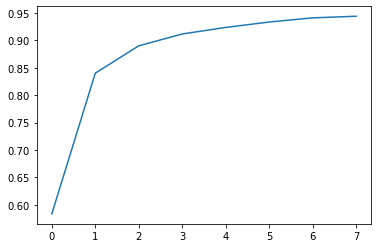

In [11]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()